Task 4 : Exploratory data analysis - Terrorism


GRIP @ The Sparks Foundation

Author : Kacem Rania

#Importing Libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math

#reading the data

In [7]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = 'ISO-8859-1')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:
dataset.shape

(7316, 135)

#Expolratory Data Analysis

In [9]:
dataset.columns.values  #Checking the column names

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [10]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','Country_txt':'country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)


In [11]:
dataset = dataset[['Year','Month','day','country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [12]:
dataset.columns.values 

array(['Year', 'Month', 'day', 'country', 'State', 'Region', 'City',
       'latitude', 'longitude', 'Attacktype', 'kill', 'Wound', 'target1',
       'summary', 'Group', 'Targettype', 'Weapon', 'motive'], dtype=object)

In [13]:
dataset.shape

(7316, 18)

In [14]:
dataset.isnull().sum()

Year             0
Month            0
day              0
country          0
State           26
Region           0
City             0
latitude       183
longitude      183
Attacktype       0
kill           809
Wound         2043
target1         66
summary       6461
Group            1
Targettype       0
Weapon           1
motive        6725
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        7316 non-null   int64  
 1   Month       7316 non-null   int64  
 2   day         7316 non-null   int64  
 3   country     7316 non-null   int64  
 4   State       7290 non-null   object 
 5   Region      7316 non-null   object 
 6   City        7316 non-null   object 
 7   latitude    7133 non-null   float64
 8   longitude   7133 non-null   float64
 9   Attacktype  7316 non-null   object 
 10  kill        6507 non-null   float64
 11  Wound       5273 non-null   float64
 12  target1     7250 non-null   object 
 13  summary     855 non-null    object 
 14  Group       7315 non-null   object 
 15  Targettype  7316 non-null   object 
 16  Weapon      7315 non-null   object 
 17  motive      591 non-null    object 
dtypes: float64(4), int64(4), object(10)
memory usage: 1.0+ MB


In [16]:
dataset.describe()

,Year,Month,day,country,latitude,longitude,kill,Wound
count,7316.000000,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,6507.000000,5273.000000
mean,1975.003417,6.523237,15.129579,238.453390,34.842112,-22.783191,0.785923,1.061255
std,2.675243,3.477868,9.053688,194.540953,22.248928,52.465516,6.264323,7.851273
min,1970.000000,0.000000,0.000000,4.000000,-45.867889,-157.818968,0.000000,0.000000
25%,1973.000000,3.000000,7.000000,98.000000,33.888523,-73.931351,0.000000,0.000000
50%,1976.000000,6.000000,15.000000,185.000000,41.106178,-5.956210,0.000000,0.000000
75%,1977.000000,10.000000,23.000000,217.000000,48.856644,9.407588,1.000000,0.000000
max,1979.000000,12.000000,31.000000,605.000000,64.837778,172.636225,422.000000,285.000000


In [17]:
dataset['Wound'] = dataset['Wound'].fillna(0)
dataset['kill'] = dataset['kill'].fillna(0)

In [18]:
dataset['Casualities'] = dataset['kill'] + dataset['Wound']

In [19]:

print("Country with the most attacks:",dataset['country'].value_counts().idxmax())
print("City with the most attacks:",dataset['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",dataset['Region'].value_counts().idxmax())
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax())
print("Month with the most attacks:",dataset['Month'].value_counts().idxmax())
print("Group with the most attacks:",dataset['Group'].value_counts().index[1])
print("Most Attack Types:",dataset['Attacktype'].value_counts().idxmax())

Country with the most attacks: 603
City with the most attacks: New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1978
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


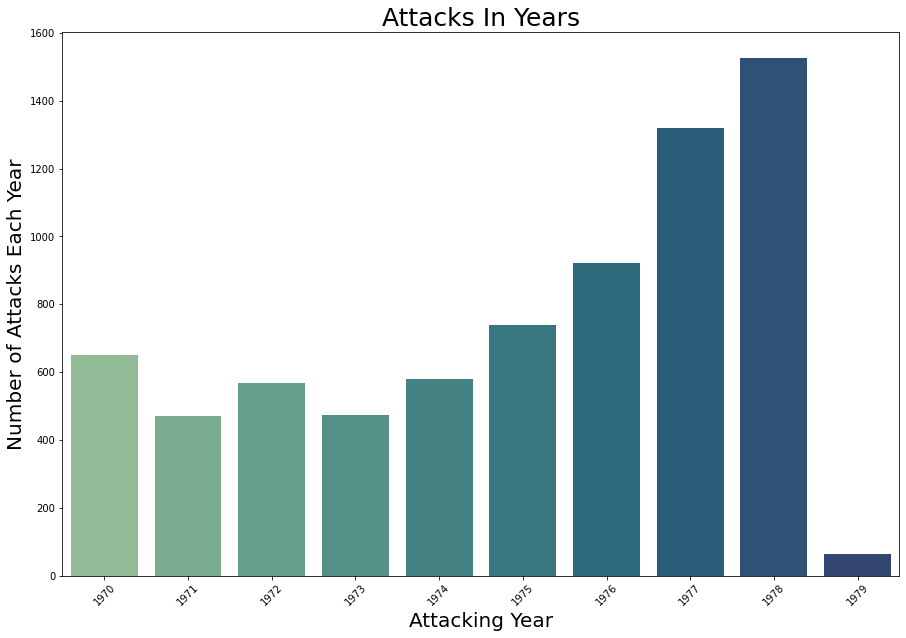

In [20]:
year = dataset['Year'].unique()
years_count = dataset['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,10))
sns.barplot(x = year, y = years_count, palette = "crest")
plt.xticks(rotation = 45)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize= 25)
plt.show()


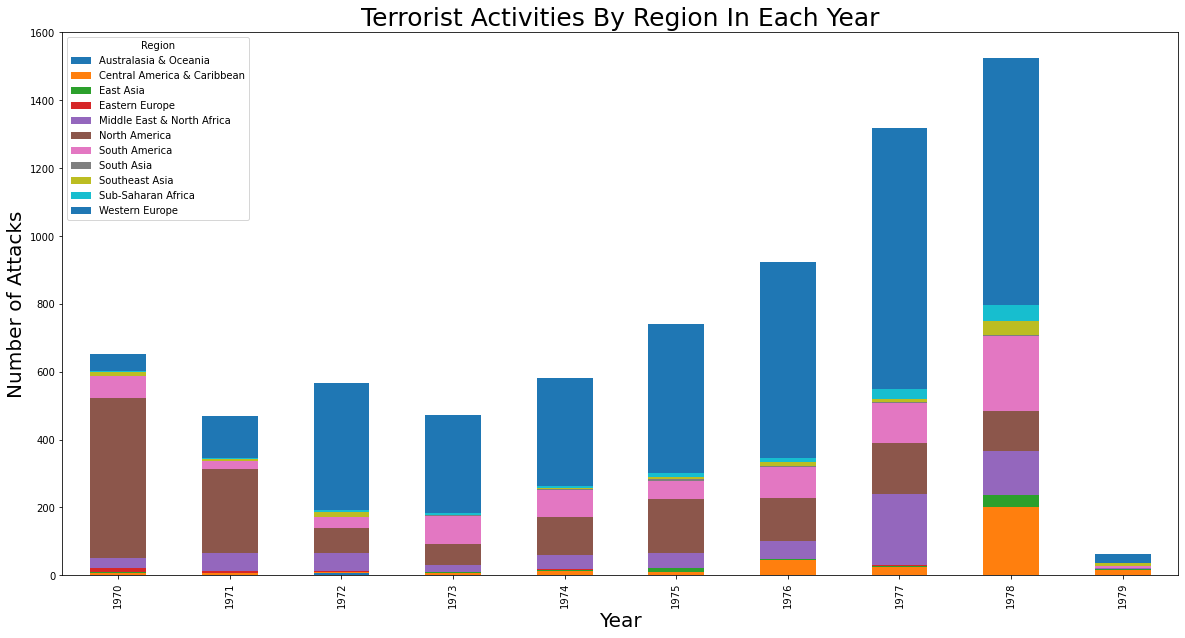

In [21]:
pd.crosstab(dataset.Year, dataset.Region).plot(kind='bar',stacked= True,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


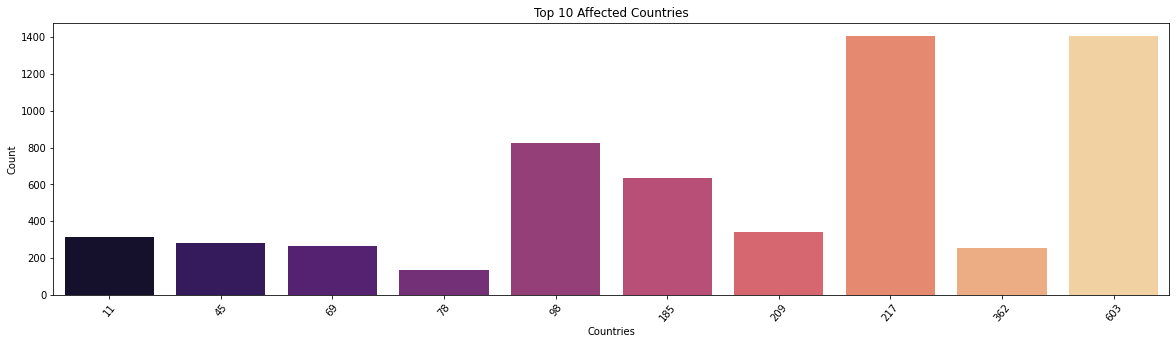

In [22]:
plt.subplots(figsize=(20,5))
sns.barplot(dataset['country'].value_counts()[:10].index,dataset['country'].value_counts()[:10].values,palette= 'magma')
plt.title('Top 10 Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

In [23]:
city = dataset['City'].value_counts()[0:50]
city.head()


Belfast          732
New York City    317
Rome             290
Unknown          212
Buenos Aires     188
Name: City, dtype: int64

In [24]:
#Neglecting the unknown cities
city = city[1:20]
city

New York City    317
Rome             290
Unknown          212
Buenos Aires     188
Madrid           152
Paris            137
Athens           121
Ankara           115
Bogota           106
Milan            104
Istanbul          97
London            94
San Francisco     91
Turin             79
Los Angeles       68
San Salvador      64
Tehran            63
San Juan          62
Londonderry       61
Name: City, dtype: int64

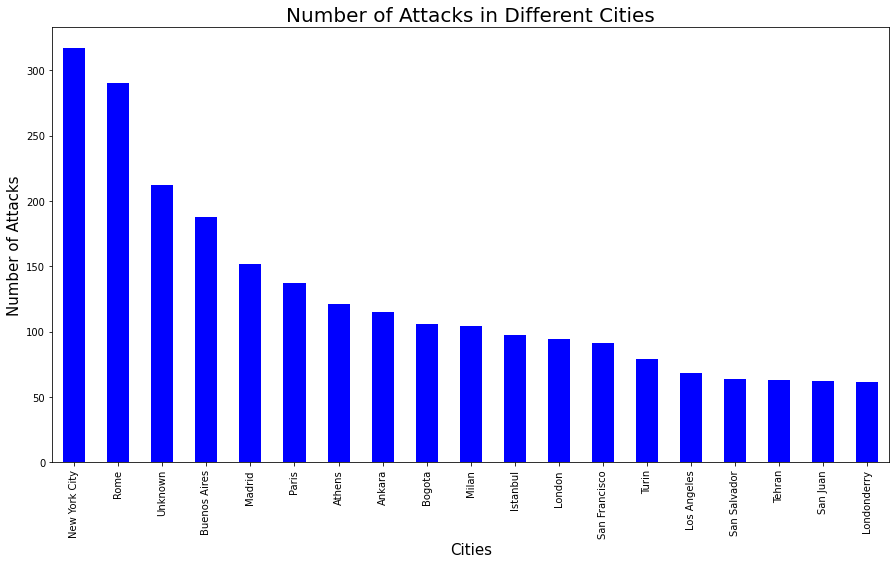

In [25]:
city = city.transpose()
city.plot(kind="bar",  figsize=(15,8),color=['blue'] )
plt.title("Number of Attacks in Different Cities", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 15)
plt.xlabel("Cities", fontsize = 15)
plt.show()

In [26]:
attack = dataset.country.value_counts()[:10]
attack

603    1407
217    1406
98      824
185     632
209     343
11      314
45      282
69      265
362     256
78      134
Name: country, dtype: int64

In [27]:
dataset.Group.value_counts()[1:10]

Irish Republican Army (IRA)                      820
Basque Fatherland and Freedom (ETA)              263
Protestant extremists                            188
Left-Wing Militants                              169
Ulster Volunteer Force (UVF)                     164
Red Brigades                                     124
Black September                                  120
Montoneros (Argentina)                           109
Fuerzas Armadas de Liberacion Nacional (FALN)     96
Name: Group, dtype: int64

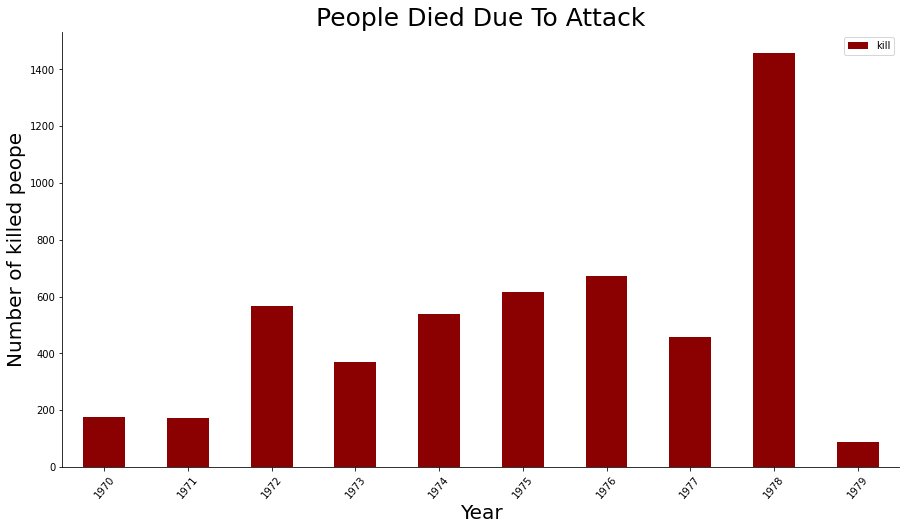

In [28]:
df = dataset[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(15,8))
df.plot(kind='bar',ax=ax4, color = 'darkred')
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

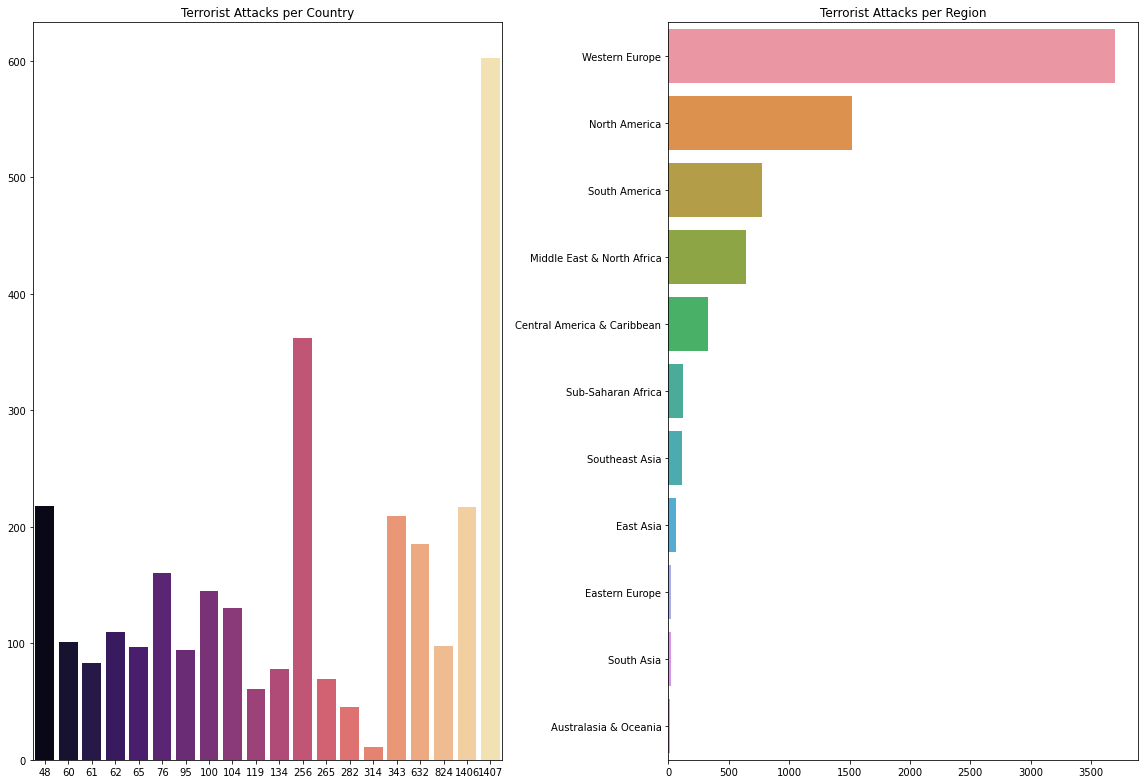

In [29]:
#Country and region

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = dataset['country'].value_counts()[:20].values, y = dataset['country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=dataset['Region'].value_counts().values,y=dataset['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


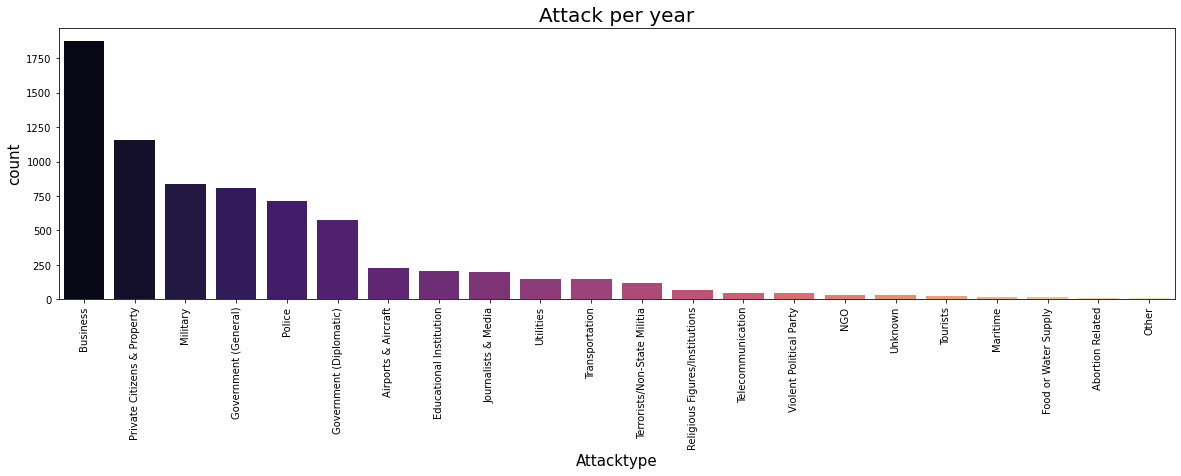

In [30]:
plt.subplots(figsize=(20,5))
sns.countplot(dataset["Targettype"],order=dataset['Targettype'].value_counts().index,palette="magma");
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

In [31]:

attack_type = dataset['Attacktype'].value_counts()
attack_type


Bombing/Explosion                      3277
Assassination                          1490
Armed Assault                           989
Facility/Infrastructure Attack          908
Hostage Taking (Kidnapping)             395
Hostage Taking (Barricade Incident)      96
Unknown                                  91
Hijacking                                52
Unarmed Assault                          18
Name: Attacktype, dtype: int64

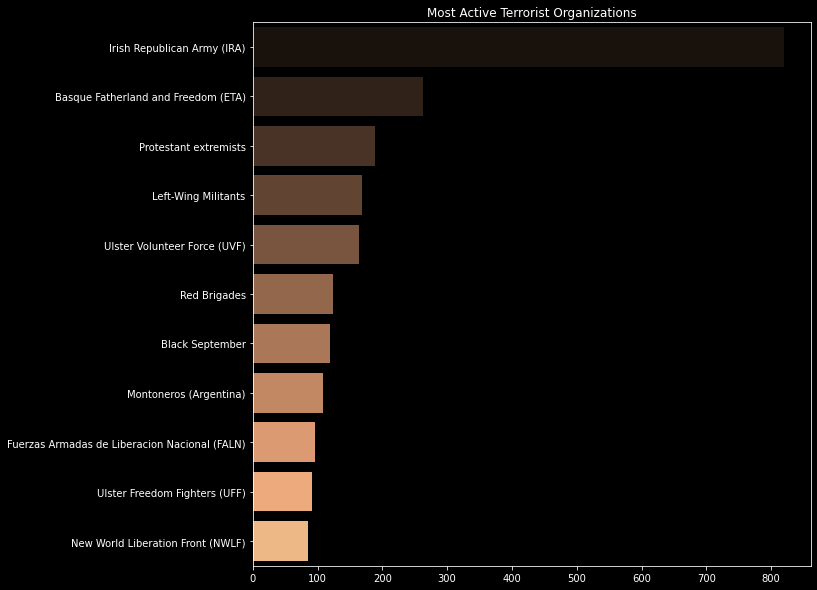

In [33]:
#Most active organizations

plt.subplots(figsize=(10,10))
sns.barplot(y=dataset['Group'].value_counts()[1:12].index,x=dataset['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

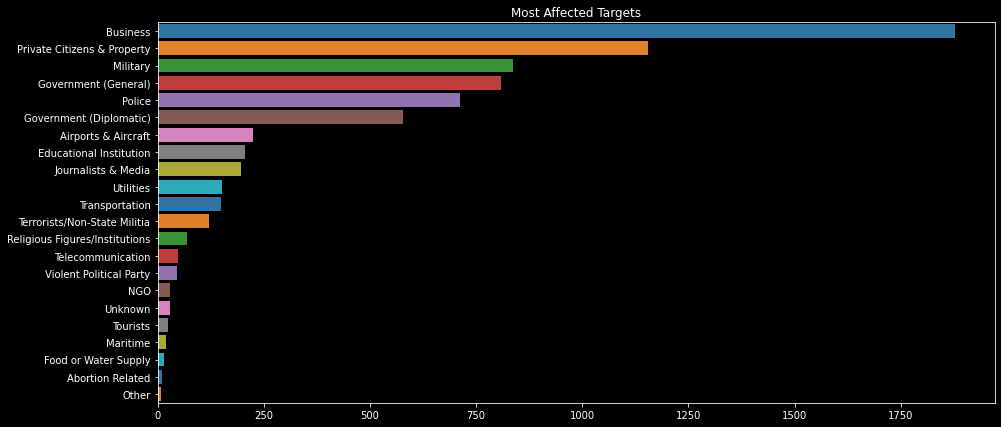

In [34]:
#Most affected targets

plt.subplots(figsize=(15,7))
sns.barplot(y=dataset['Targettype'].value_counts().index,x=dataset['Targettype'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

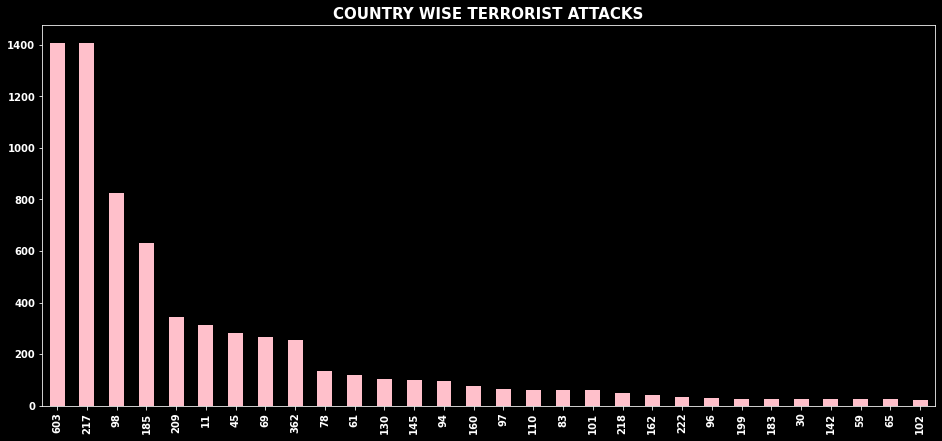

In [35]:
plt.style.use('dark_background')
dataset['country'].value_counts().head(30).plot.bar(figsize=(16,7),color='pink')
plt.title("COUNTRY WISE TERRORIST ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

#Regional analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

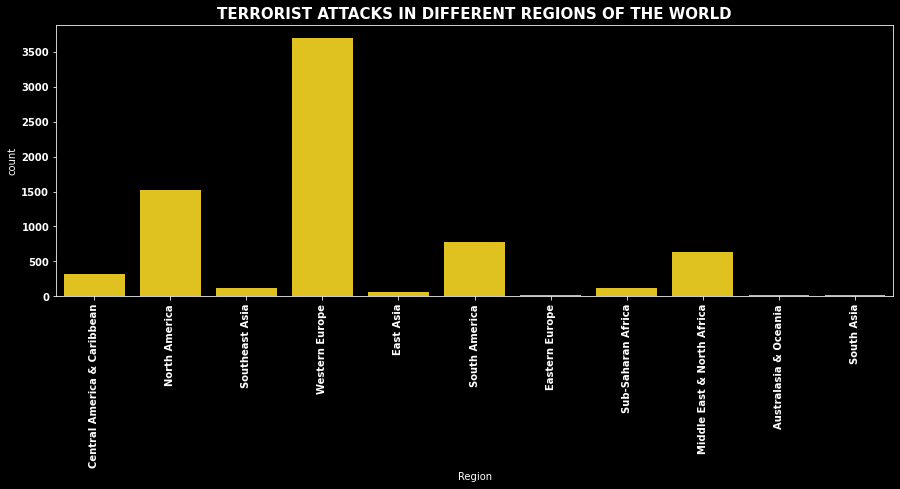

In [36]:
plt.style.use('dark_background')
plt.subplots(figsize=(15,5))
sns.countplot(dataset['Region'],color='#FFD700')
plt.title("TERRORIST ATTACKS IN DIFFERENT REGIONS OF THE WORLD",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

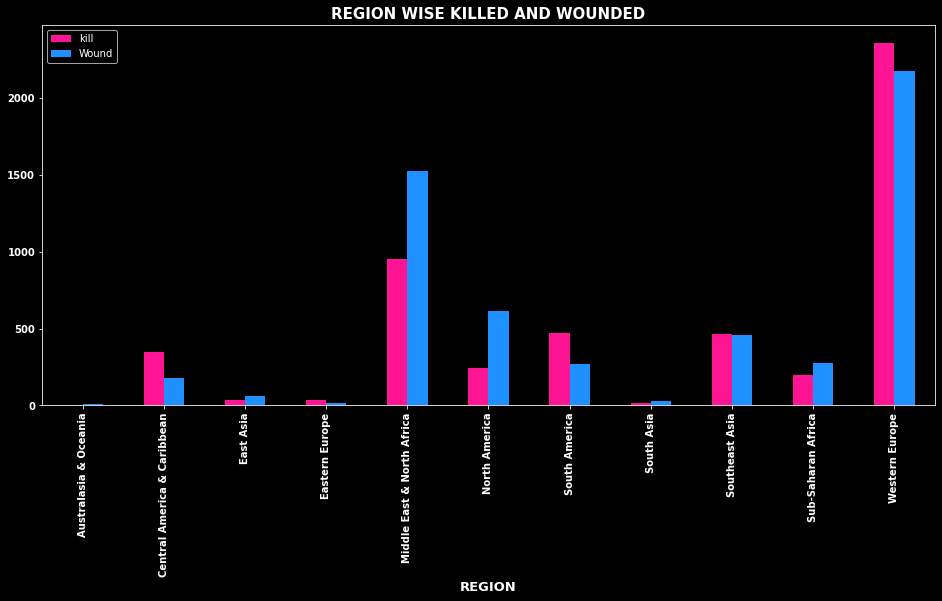

In [37]:
plt.style.use('dark_background')
dataset.groupby(['Region'])['kill','Wound'].sum().plot.bar(color=['#FF1493','#1E90FF'],figsize=(16,7))
plt.title("REGION WISE KILLED AND WOUNDED",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xlabel("REGION",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

1. East Asia , Central Asia, Australasia & Ocania are best region with less Attacks and Fatalities.
2. Middle East & North Africa and South Asia are th emost attacked regions and have lost more than one Lakh People.

GROUP WISE ANALYSIS

Text(0.5, 1.0, 'GROUPS WITH HIGHEST NUMBER OF ATTACKS')

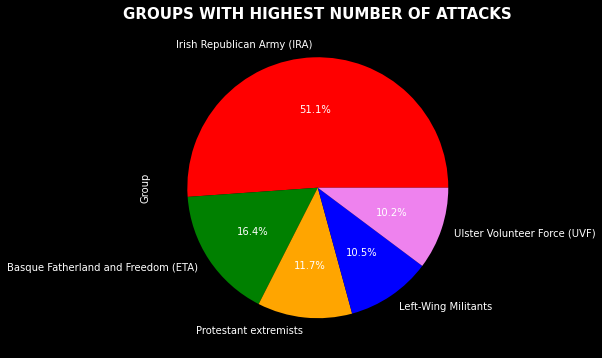

In [38]:
group_df=dataset[dataset['Group']!='Unknown']
plt.style.use('dark_background')
group_df['Group'].value_counts().head().plot.pie(figsize=(12,6),autopct="%.1f%%",colors=["red",'green','orange','blue','violet'])
plt.title("GROUPS WITH HIGHEST NUMBER OF ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

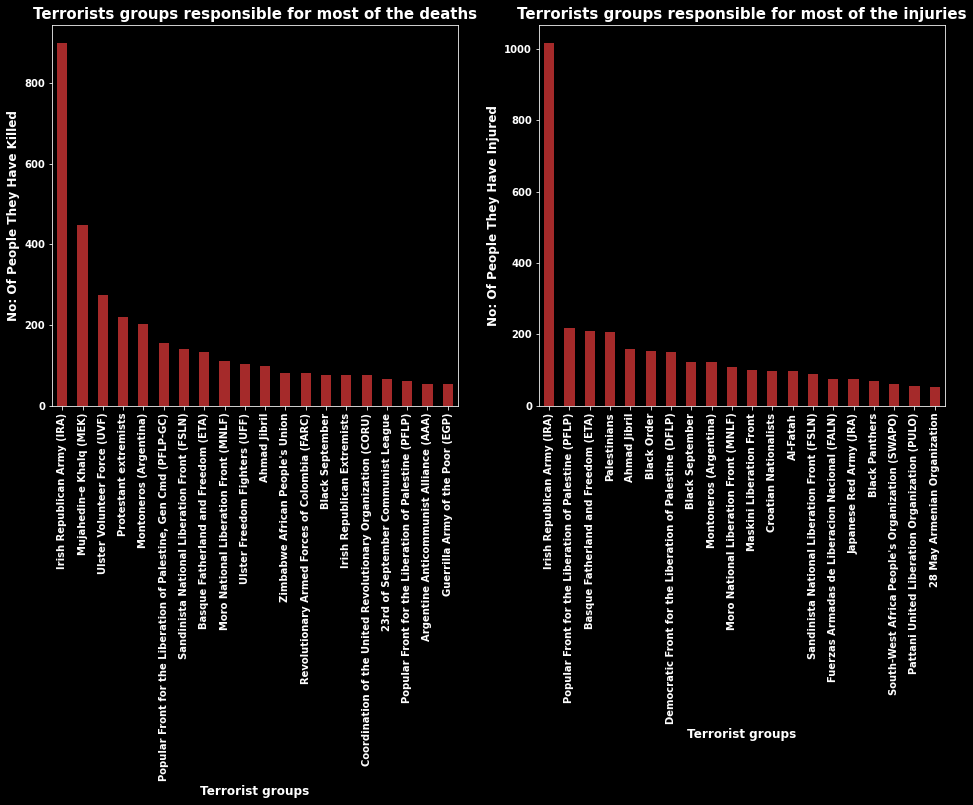

In [39]:
plt.style.use('dark_background')
plt.subplot(1,2,1)
group_df.groupby(['Group'])['kill'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='brown')
plt.ylabel("No: Of People They Have Killed",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the deaths",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(1,2,2)
group_df.groupby(['Group'])['Wound'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='brown')
plt.ylabel("No: Of People They Have Injured",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the injuries",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

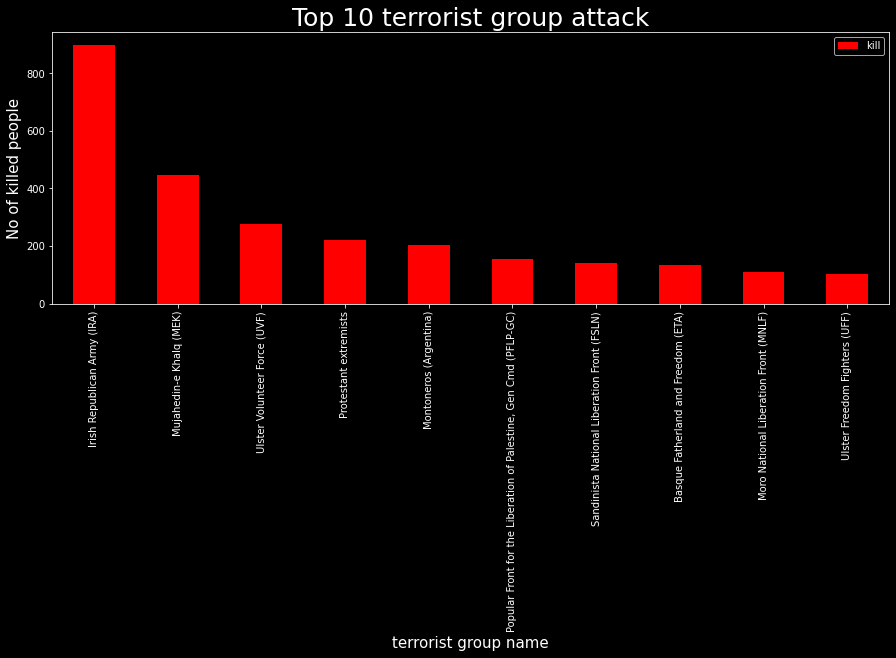

In [40]:
dataset[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(15,5))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

#Observation

(i) Maximum number of attacks in 2014 in "Middle East & north Africa".

(ii)'Taliban' group attacks most and most attack types : Bombing/Explosion

(iii) Minimum number of attacks in 1971 in "Australasia & Oceania" caused 282 Casualities

(iv) Country with the most attacks: Iraq and most attacked city : Baghdad

(v) Casualities consists of 411868 deaths and 523869 peoples were wounded